In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### CATBOOST

In [2]:
df_train = pd.read_csv('../data/train_con_features.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes
0,254099,depto tipo a 402,depto interior de 80 15m2 consta de sala com...,Apartamento,avenida division del norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,...,0,0,0,0,0.000000,1,0,0,2015,8
1,53461,condominio horizontal en venta,p entre sonora y guerrero atr aacute s del h...,Casa en condominio,av mexico,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,0,0,0,1,0.007968,1,0,0,2013,6
2,247984,casa en venta urbi 3 recamaras tonala,descripcion la mejor ubicacion residencial en...,Casa,urbi tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,0,0,0,10,0.046957,0,0,0,2015,10
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,ignacio manuel altamirano 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,0,0,0,0.000000,0,0,0,2012,3
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,paseos del sol,Zapopan,Jalisco,10.000000,2.0,1.0,...,0,0,0,1,0.074108,0,0,0,2016,6


In [3]:
lst_propiedades = ['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 
                   'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
                   'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'bano_por_habitacion', 
                   'garages_por_habitacion', 'precio_prom_propiedad']

lst_tipos_propiedades = ['es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno',
                         'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional',
                         'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo',
                         'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros',
                         'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos',
                         'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho',
                         'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage']

lst_cantidad_palabras = ['seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 
                         'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
                         'relacion_palabras_descripcion', 'cantidad_palabras_descripcion']

lst_ciudades = ['provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15', 'precio_prom_ciudad', 'idzona']

lst_fechas = ['anio', 'mes']

columnas_numericas = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras + lst_fechas + lst_ciudades
columnas_numericas_y_precio = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras + lst_fechas + lst_ciudades
columnas_numericas_y_precio.append('precio')

In [4]:
X = df_train[columnas_numericas_y_precio].drop(columns=['precio']).values
y = df_train['precio'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(168000, 62) (168000,)
(72000, 62) (72000,)


In [12]:
#NUEVA
#X_train = df_train.loc[df_train['anio'] != 2016][columnas_numericas_y_precio].drop(columns=['precio','anio']).values
#y_train = df_train.loc[df_train['anio'] != 2016]['precio'].values

#X_test = df_train.loc[df_train['anio'] == 2016][columnas_numericas_y_precio].drop(columns=['precio','anio']).values
#y_test = df_train.loc[df_train['anio'] == 2016]['precio'].values

In [6]:
from catboost import CatBoostRegressor
CatBoost = CatBoostRegressor(iterations=1000, loss_function='MAE')

In [ ]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = CatBoost.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=False)

0:	loss: 643883.3996897	best: 643883.3996897 (0)	total: 2m 13s	remaining: 1h 4m 24s
1:	loss: 603410.2226394	best: 603410.2226394 (1)	total: 4m 8s	remaining: 57m 58s
2:	loss: 644560.7796218	best: 603410.2226394 (1)	total: 5m 46s	remaining: 51m 59s
3:	loss: 603536.6955934	best: 603410.2226394 (1)	total: 7m 19s	remaining: 47m 35s
4:	loss: 645347.7026995	best: 603410.2226394 (1)	total: 8m 54s	remaining: 44m 31s
5:	loss: 603404.4773868	best: 603404.4773868 (5)	total: 10m 22s	remaining: 41m 31s
6:	loss: 644145.9609838	best: 603404.4773868 (5)	total: 11m 54s	remaining: 39m 8s
7:	loss: 603595.2788493	best: 603404.4773868 (5)	total: 13m 39s	remaining: 37m 34s
8:	loss: 643851.8973290	best: 603404.4773868 (5)	total: 15m 25s	remaining: 36m
9:	loss: 603039.5303689	best: 603039.5303689 (9)	total: 17m 4s	remaining: 34m 9s
10:	loss: 609664.7048902	best: 603039.5303689 (9)	total: 18m 46s	remaining: 32m 25s
11:	loss: 579867.1303797	best: 579867.1303797 (11)	total: 20m 35s	remaining: 30m 53s
12:	loss: 61

In [ ]:
grid_search_result['params']

In [7]:
#depth=10, l2_leaf_reg=5, learning_rate=0.1 -> sin separar anios
best_depth = 10#grid_search_result['params']['depth']
best_l2_leaf_reg = 5#grid_search_result['params']['l2_leaf_reg']
best_learning_rate = 0.1#grid_search_result['params']['learning_rate']

In [8]:
CatBoost = CatBoostRegressor(iterations=1000, loss_function='MAE', depth=best_depth, 
                             l2_leaf_reg=best_l2_leaf_reg, learning_rate=best_learning_rate)
CatBoost_fit = CatBoost.fit(X_train, y_train)

0:	learn: 1416426.2884035	total: 504ms	remaining: 8m 23s
1:	learn: 1326926.9709001	total: 808ms	remaining: 6m 43s
2:	learn: 1248217.1936991	total: 1.07s	remaining: 5m 57s
3:	learn: 1179008.9097638	total: 1.32s	remaining: 5m 29s
4:	learn: 1120137.7367133	total: 1.61s	remaining: 5m 19s
5:	learn: 1067587.1799213	total: 1.86s	remaining: 5m 8s
6:	learn: 1022878.3027384	total: 2.13s	remaining: 5m 1s
7:	learn: 985492.2297641	total: 2.37s	remaining: 4m 53s
8:	learn: 948603.8028631	total: 2.62s	remaining: 4m 48s
9:	learn: 918454.2499516	total: 2.87s	remaining: 4m 43s
10:	learn: 893295.6116644	total: 3.11s	remaining: 4m 39s
11:	learn: 866724.5207430	total: 3.34s	remaining: 4m 34s
12:	learn: 846644.2041830	total: 3.56s	remaining: 4m 30s
13:	learn: 828366.5700477	total: 3.8s	remaining: 4m 27s
14:	learn: 813129.7705990	total: 4.03s	remaining: 4m 24s
15:	learn: 798480.3442326	total: 4.26s	remaining: 4m 21s
16:	learn: 786334.5433915	total: 4.48s	remaining: 4m 18s
17:	learn: 774780.0233502	total: 4.7s

In [9]:
CatBoost_pred = CatBoost_fit.predict(X_test)

In [10]:
from sklearn.metrics import mean_absolute_error

CatBoost_mae = mean_absolute_error(y_test, CatBoost_pred)
CatBoost_mae_train = mean_absolute_error(y_train, CatBoost_fit.predict(X_train))
print(f"MAE CATBoost (train): {CatBoost_mae_train:.5f}")
print(f"MAE CATBoost: {CatBoost_mae:.5f}")
print("------------------------------")

MAE CATBoost (train): 448299.78074
MAE CATBoost: 559853.59087
------------------------------


In [12]:
CatBoost_fit.feature_importances_

array([4.15484115e+00, 1.68298496e+00, 2.65780621e+00, 2.73654536e+00,
       1.52464475e+01, 8.18318525e+00, 1.40846085e-01, 5.32769373e-02,
       2.74203329e-01, 2.61654031e-01, 3.11204447e-01, 4.40281680e-01,
       3.96836276e-01, 2.08946888e+00, 4.66938829e+00, 2.09808017e+00,
       5.02438822e-01, 1.60870577e-01, 3.00582361e+00, 1.30834157e+00,
       3.95351089e+00, 2.96640090e+00, 1.65821862e-01, 6.47196065e-01,
       4.68646363e-01, 3.88230457e-01, 2.53697982e-01, 2.98003662e-02,
       1.12151276e-01, 1.30177918e-01, 4.13973703e-02, 3.82836331e-02,
       2.19269546e-01, 1.51830889e-02, 1.44959314e-02, 3.99096125e-04,
       1.31383906e-02, 5.98845584e-03, 3.15235205e-02, 1.98799884e-02,
       1.24103259e-02, 3.45319515e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.57976088e-01, 1.12327555e-01, 3.22479841e-01,
       3.04045595e-01, 1.65732589e-02, 2.36723099e-02, 1.50652596e-01,
       1.80015439e-01, 1.52820250e+00, 2.95187301e-01, 4.95146768e+00,
      

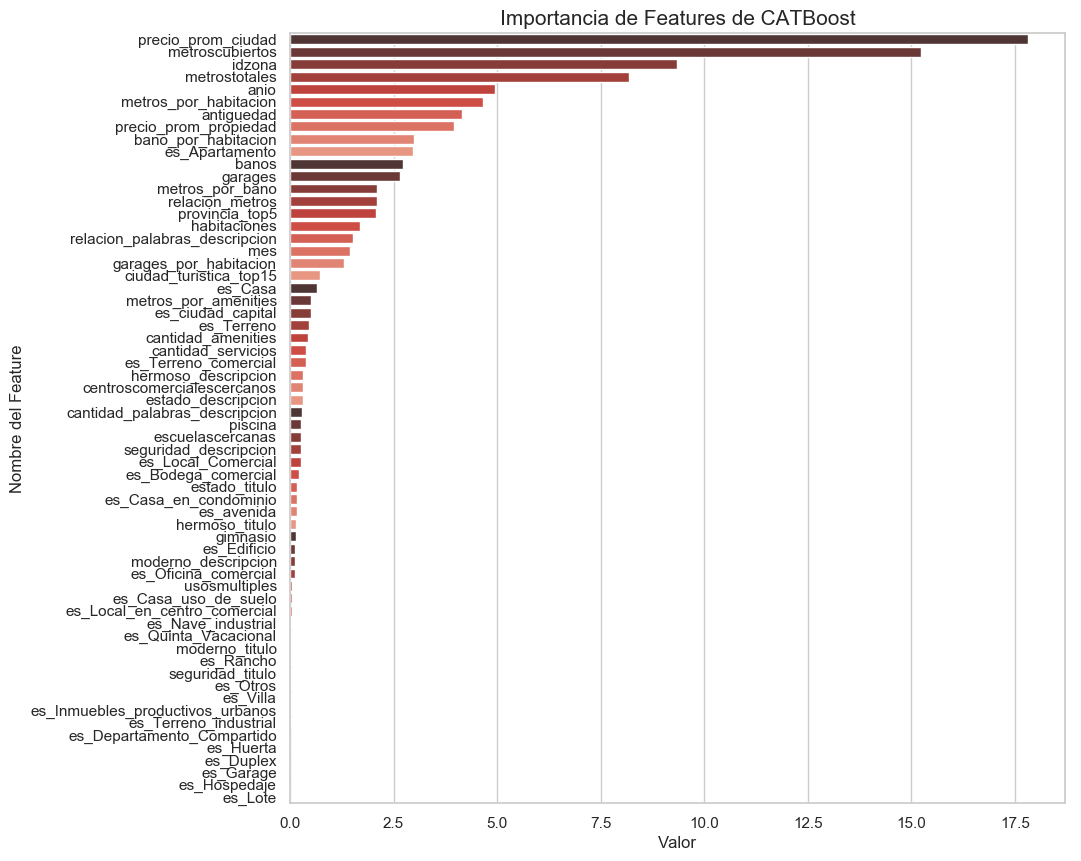

In [13]:
#cols = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras + lst_ciudades + ['mes']
features = pd.DataFrame(index=columnas_numericas)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [14]:
df_train_sumbit = df_train[columnas_numericas_y_precio]
df_test_submit = df_test[columnas_numericas]
CatBoost_pred_sumbit = CatBoostRegressor(iterations=1000, loss_function='MAE', depth=best_depth, 
                             l2_leaf_reg=best_l2_leaf_reg, learning_rate=best_learning_rate)\
                        .fit(df_train_sumbit[columnas_numericas], df_train_sumbit['precio'])\
                        .predict(df_test_submit[columnas_numericas])

0:	learn: 1416304.2388876	total: 314ms	remaining: 5m 13s
1:	learn: 1324843.0559444	total: 577ms	remaining: 4m 47s
2:	learn: 1242733.1186426	total: 853ms	remaining: 4m 43s
3:	learn: 1171262.6724124	total: 1.13s	remaining: 4m 40s
4:	learn: 1111796.0842710	total: 1.47s	remaining: 4m 52s
5:	learn: 1061219.9662048	total: 1.8s	remaining: 4m 57s
6:	learn: 1015573.2592050	total: 2.08s	remaining: 4m 55s
7:	learn: 974337.7189042	total: 2.42s	remaining: 5m
8:	learn: 939585.1709074	total: 2.69s	remaining: 4m 55s
9:	learn: 908754.4223028	total: 2.97s	remaining: 4m 54s
10:	learn: 883855.3827814	total: 3.3s	remaining: 4m 56s
11:	learn: 861266.8717330	total: 3.57s	remaining: 4m 53s
12:	learn: 840606.6948705	total: 3.86s	remaining: 4m 52s
13:	learn: 824438.0424497	total: 4.13s	remaining: 4m 51s
14:	learn: 808358.9187729	total: 4.39s	remaining: 4m 48s
15:	learn: 795147.6402630	total: 4.67s	remaining: 4m 47s
16:	learn: 782373.2829873	total: 5s	remaining: 4m 48s
17:	learn: 771828.0841695	total: 5.31s	rema

In [15]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = df_test['id']
resultado_submit['target'] = CatBoost_pred_sumbit
display(resultado_submit.head())
resultado_submit.to_csv('../data/sumbitCATBoost.csv',index=False)

,id,target
0,4941,6.180610e+06
1,51775,9.296612e+05
2,115253,2.427857e+06
3,299321,1.495483e+06
4,173570,5.444197e+05


#### Score en Kaggle (features => score):

 **1.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'es_Apartamento', 'es_Casa', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'esstado_titulo','relacion_palabras_descripcion', 'cantidad_palabras_descripcion','provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15']=>* ***824756.87687*** con iterations=1000, depth=5, learning_rate=0.05, loss_function='MAE'
 
 
  **2.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'bano_por_habitacion', 'garages_por_habitacion', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15', 'precio_prom_ciudad', 'anio', 'mes'] =>* ***578020.34173*** con iterations=1000, depth=10, l2_leaf_reg=5, learning_rate=0.1, loss_function='MAE'
   
  **3.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'bano_por_habitacion', 'garages_por_habitacion', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15', 'precio_prom_ciudad', 'anio', 'mes', 'precio_prom_propiedad'] =>* ***578576.71374*** con iterations=1000, depth=10, l2_leaf_reg=5, learning_rate=0.1, loss_function='MAE'
  
  **4.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'bano_por_habitacion', 'garages_por_habitacion', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15', 'precio_prom_ciudad', 'anio', 'mes', 'precio_prom_propiedad', 'idzona'] =>* ***578576.71374*** con iterations=1000, depth=10, l2_leaf_reg=5, learning_rate=0.1, loss_function='MAE' 
  
  **5.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'bano_por_habitacion', 'garages_por_habitacion', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15', 'precio_prom_ciudad', 'anio', 'mes', 'precio_prom_propiedad', 'idzona'] =>* ***556959.54912*** con iterations=1000, depth=10, l2_leaf_reg=5, learning_rate=0.1, loss_function='MAE' -.- train_test_split(X,y, test_size=0.3, random_state=0)
  

In [16]:
features.index

Index(['precio_prom_ciudad', 'metroscubiertos', 'idzona', 'metrostotales',
       'anio', 'metros_por_habitacion', 'antiguedad', 'precio_prom_propiedad',
       'bano_por_habitacion', 'es_Apartamento', 'banos', 'garages',
       'metros_por_bano', 'relacion_metros', 'provincia_top5', 'habitaciones',
       'relacion_palabras_descripcion', 'mes', 'garages_por_habitacion',
       'ciudad_turistica_top15', 'es_Casa', 'metros_por_amenities',
       'es_ciudad_capital', 'es_Terreno', 'cantidad_amenities',
       'cantidad_servicios', 'es_Terreno_comercial', 'hermoso_descripcion',
       'centroscomercialescercanos', 'estado_descripcion',
       'cantidad_palabras_descripcion', 'piscina', 'escuelascercanas',
       'seguridad_descripcion', 'es_Local_Comercial', 'es_Bodega_comercial',
       'estado_titulo', 'es_Casa_en_condominio', 'es_avenida',
       'hermoso_titulo', 'gimnasio', 'es_Edificio', 'moderno_descripcion',
       'es_Oficina_comercial', 'usosmultiples', 'es_Casa_uso_de_suelo',
 